# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | minas de marcona
Processing Record 4 of Set 1 | inhambane
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | ayod
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | kerikeri
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | kalabo
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | polyarnyy
Processing Record 18 of Set 1 | hammerfest
Processing Record 19 of Set 1 | nadym
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | wailua

Processing Record 38 of Set 4 | badger
Processing Record 39 of Set 4 | brigantine
Processing Record 40 of Set 4 | arraial do cabo
Processing Record 41 of Set 4 | boca suno
Processing Record 42 of Set 4 | pont rouge
Processing Record 43 of Set 4 | reggane
Processing Record 44 of Set 4 | laboulaye
Processing Record 45 of Set 4 | crane
Processing Record 46 of Set 4 | isangel
Processing Record 47 of Set 4 | rzhaksa
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | stanley
Processing Record 0 of Set 5 | kamina
Processing Record 1 of Set 5 | yarkovo
Processing Record 2 of Set 5 | karatsu
Processing Record 3 of Set 5 | caleta de carquin
Processing Record 4 of Set 5 | kingston
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | galesburg
Processing Record 7 of Set 5 | rabigh
Processing Record 8 of Set 5 | spinetta marengo
Processing Record 9 of Set 5 | tahoua
Processing Record 10 of Set 5 | las lomitas
Processing Record 11 of Set 5 | sirre
Processing Reco

City not found. Skipping...
Processing Record 33 of Set 8 | amurzet
Processing Record 34 of Set 8 | isiro
Processing Record 35 of Set 8 | saskatoon
Processing Record 36 of Set 8 | preobrazheniye
Processing Record 37 of Set 8 | mundra
Processing Record 38 of Set 8 | imperatriz
Processing Record 39 of Set 8 | hasaki
Processing Record 40 of Set 8 | san justo
Processing Record 41 of Set 8 | coquimbo
Processing Record 42 of Set 8 | praia
Processing Record 43 of Set 8 | bahia blanca
Processing Record 44 of Set 8 | bandon
Processing Record 45 of Set 8 | garachico
Processing Record 46 of Set 8 | aibak
Processing Record 47 of Set 8 | alice springs
Processing Record 48 of Set 8 | haiku-pauwela
Processing Record 49 of Set 8 | ad dilam
Processing Record 0 of Set 9 | rio turbio
City not found. Skipping...
Processing Record 1 of Set 9 | bam
Processing Record 2 of Set 9 | lisala
Processing Record 3 of Set 9 | aykol
City not found. Skipping...
Processing Record 4 of Set 9 | yerba buena
Processing Reco

Processing Record 24 of Set 12 | nacozari de garcia
Processing Record 25 of Set 12 | tateyama
Processing Record 26 of Set 12 | raja
Processing Record 27 of Set 12 | santa ana de yacuma
Processing Record 28 of Set 12 | rubizhne
Processing Record 29 of Set 12 | smithers
Processing Record 30 of Set 12 | general pico
Processing Record 31 of Set 12 | taulaga
Processing Record 32 of Set 12 | el copey
Processing Record 33 of Set 12 | ust'-uda
Processing Record 34 of Set 12 | nangen
Processing Record 35 of Set 12 | kolonia town
Processing Record 36 of Set 12 | axim
Processing Record 37 of Set 12 | jaca
Processing Record 38 of Set 12 | sos'va
Processing Record 39 of Set 12 | port augusta
Processing Record 40 of Set 12 | taltal
Processing Record 41 of Set 12 | sattahip
Processing Record 42 of Set 12 | kalmunai
Processing Record 43 of Set 12 | pacasmayo
Processing Record 44 of Set 12 | gao
Processing Record 45 of Set 12 | nova vicosa
Processing Record 46 of Set 12 | valparaiso
Processing Record 4

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.84,64,77,16.50,TF,1689877885
1,adamstown,-25.0660,-130.1015,22.46,82,100,17.12,PN,1689877884
2,minas de marcona,-15.2119,-75.1103,18.50,59,5,4.35,PE,1689878235
3,inhambane,-23.8650,35.3833,19.99,73,40,9.26,MZ,1689878104
4,longyearbyen,78.2186,15.6401,10.91,76,20,9.26,SJ,1689878044


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label= "City_ID")


In [18]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,18.743535,15.314531,22.185087,68.872822,54.038328,3.568467,1.689878e+09
std,32.233723,86.982764,7.913924,22.520563,40.234287,2.490361,1.830885e+02
min,-54.800000,-178.166700,-4.950000,7.000000,0.000000,0.000000,1.689878e+09
25%,-8.927600,-62.024650,16.947500,56.000000,11.000000,1.720000,1.689878e+09
50%,22.687100,21.401800,23.130000,75.000000,60.500000,2.840000,1.689878e+09
75%,45.563750,85.906000,27.572500,86.000000,100.000000,4.897500,1.689878e+09
max,78.218600,178.004200,41.980000,100.000000,100.000000,17.120000,1.689878e+09


In [70]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")


In [71]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.84,64,77,16.50,TF,1689877885
1,adamstown,-25.0660,-130.1015,22.46,82,100,17.12,PN,1689877884
2,minas de marcona,-15.2119,-75.1103,18.50,59,5,4.35,PE,1689878235
3,inhambane,-23.8650,35.3833,19.99,73,40,9.26,MZ,1689878104
4,longyearbyen,78.2186,15.6401,10.91,76,20,9.26,SJ,1689878044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [22]:
# today's data
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2023-07-20


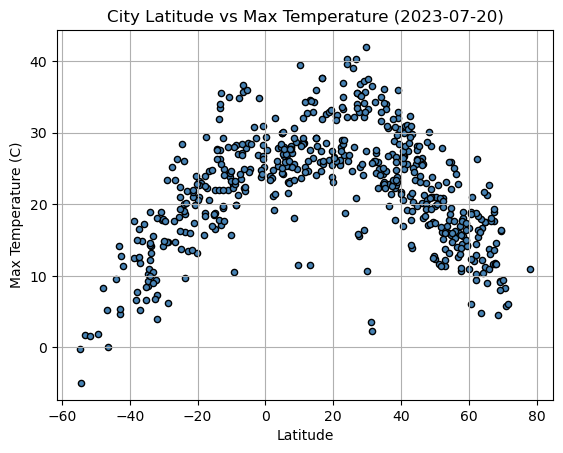

In [34]:
# Build scatter plot for latitude vs. temperature

latvstemp = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid="True", title="City Latitude vs Max Temperature (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Max Temperature (C)", marker = "o", color ="steelblue", edgecolor="black")

# Show plot
plt.show()

In [72]:
# Save the figure
plt.savefig("../output_data/Fig1.png")

<Figure size 640x480 with 0 Axes>

#### Latitude Vs. Humidity

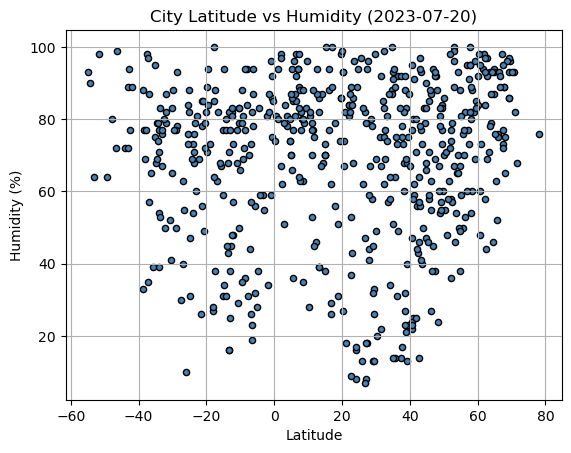

In [73]:
# Build the scatter plots for latitude vs. humidity
latvshumid = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid="True", title="City Latitude vs Humidity (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Humidity (%)", marker = "o", color ="steelblue", edgecolor="black")

# Show plot
plt.show()

In [74]:
# Save the figure
plt.savefig("../output_data/Fig2.png")

<Figure size 640x480 with 0 Axes>

#### Latitude Vs. Cloudiness

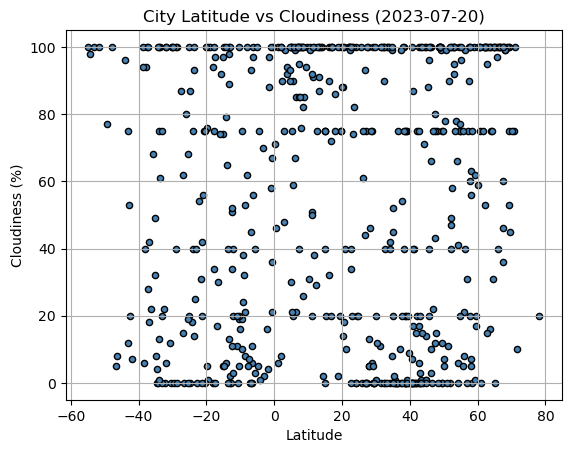

In [35]:
# Build the scatter plots for latitude vs. cloudiness

latvscloud = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid="True", title="City Latitude vs Cloudiness (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Cloudiness (%)", marker = "o", color ="steelblue", edgecolor="black")

# Show plot
plt.show()

In [75]:
# Save the figure
plt.savefig("../output_data/Fig3.png")

<Figure size 640x480 with 0 Axes>

#### Latitude vs. Wind Speed Plot

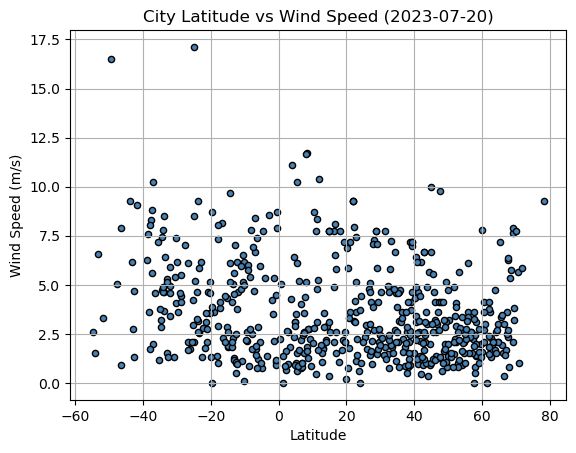

In [36]:
# Build the scatter plots for latitude vs. wind speed
latvswind = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid="True", title="City Latitude vs Wind Speed (" + str(today) +")",
                             xlabel="Latitude", ylabel = "Wind Speed (m/s)", marker = "o", color ="steelblue", edgecolor="black")

# Show plot
plt.show()

In [76]:
# Save the figure
plt.savefig("../output_data/Fig4.png")


<Figure size 640x480 with 0 Axes>

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots

def regression(x_values, y_values, x_label, y_label, x_loc=0, y_loc=0):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   
    regress_values = x_values * slope + intercept
   
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_loc,y_loc),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
   
    print(f"The r value is: {rvalue}")
   
    plt.show()

In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_condition = city_data_df["Lat"] >= 0
northern_hemi_df = city_data_df.loc[northern_condition]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,longyearbyen,78.2186,15.6401,10.91,76,20,9.26,SJ,1689878044
5,anadyr,64.7500,177.4833,11.28,87,100,3.00,RU,1689878092
6,iqaluit,63.7506,-68.5145,4.85,93,100,2.06,CA,1689877885
7,nova sintra,14.8667,-24.7167,24.06,73,40,0.34,CV,1689878058
9,nemuro,43.3236,145.5750,13.87,93,1,2.44,JP,1689877888


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_condition = city_data_df["Lat"] < 0
southern_hemi_df = city_data_df.loc[southern_condition]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.84,64,77,16.50,TF,1689877885
1,adamstown,-25.0660,-130.1015,22.46,82,100,17.12,PN,1689877884
2,minas de marcona,-15.2119,-75.1103,18.50,59,5,4.35,PE,1689878235
3,inhambane,-23.8650,35.3833,19.99,73,40,9.26,MZ,1689878104
8,ushuaia,-54.8000,-68.3000,-0.19,93,100,2.57,AR,1689878057


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.61432357808607


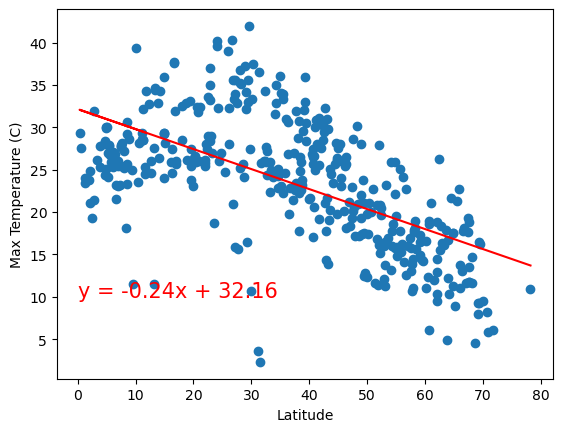

In [81]:
# Linear regression on Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", 0,10)

The r value is: 0.815437147559701


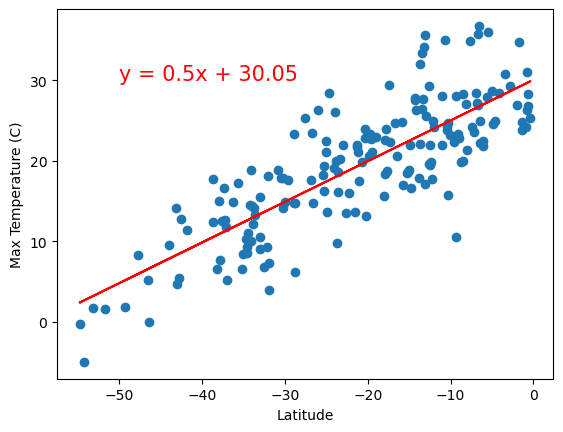

In [82]:
# Linear regression on Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", -50,30)


**Discussion about the linear relationship:** 
The linear regression is shows the relationship between temperature and latitudes in the northern and southern hemispheres.
when northern hemisphere latitude increases, we moves further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. 
For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.06709792718421732


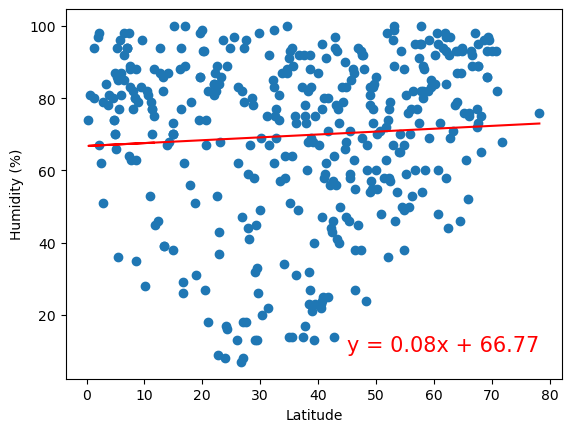

In [83]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", 45,10)

The r value is: -0.1919647063562266


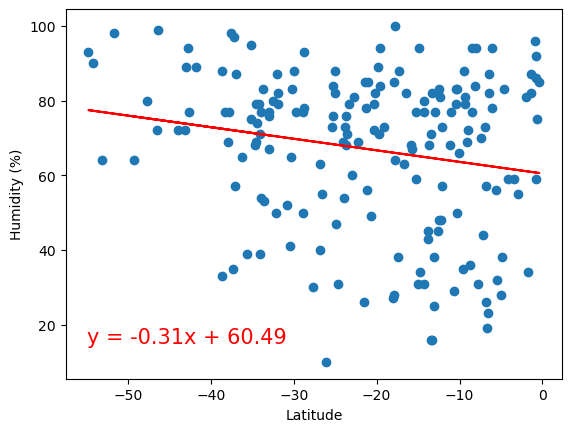

In [84]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", -55,15)


**Discussion about the linear relationship:** 
The relationship between Latitude and Humidity is not very strong,for example As latitude increases in the northern hemisphere so does humidity, which means there is no significant correlation between latitudes and humidity in the southern hemisphere.We can conclude that there is no significant relationship between latitude and humidity because humidity can impacted by other factors like air quality and temprature etc.


### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.05616514166115643


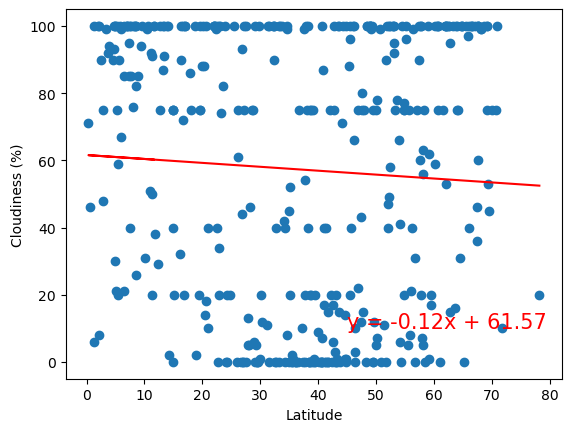

In [85]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", 45,10)


The r value is: -0.1306180333307391


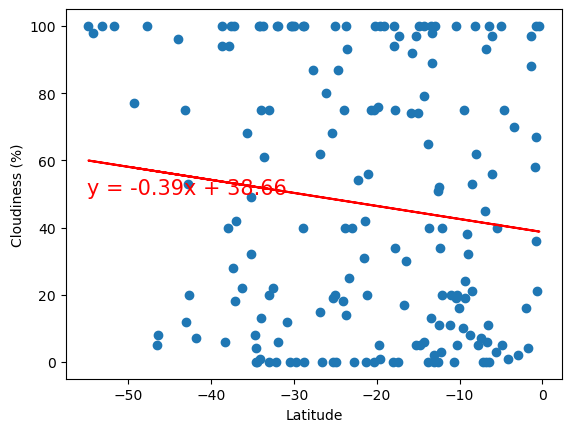

In [86]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", -55,50)


**Discussion about the linear relationship:** 
The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.09455935633555085


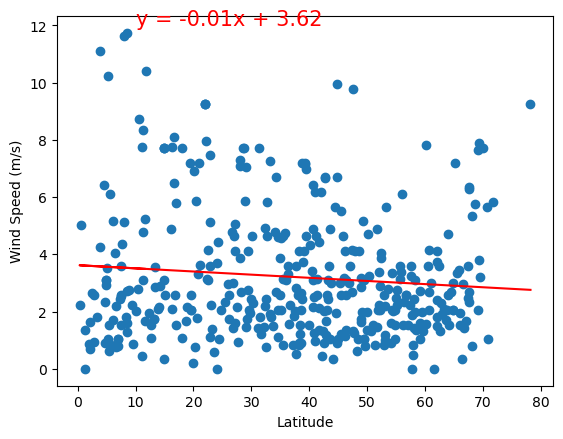

In [87]:
# Northern Hemisphere
regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", 10,12)


The r value is: -0.20558135271330014


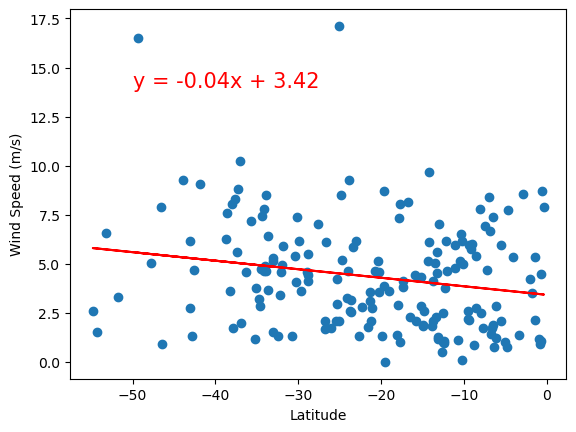

In [88]:
# Southern Hemisphere
regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", -50,14)


**Discussion about the linear relationship:** 
The relationship between Latitude and Wind Speed is not strong in the southern and northern hemisphere hence we can say that there is no significant relationship between latitude and wind speed.